<a href="https://colab.research.google.com/github/jtrobec/mids-w241-fa2020-fp/blob/main/comparingAppleToApple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 

#to import pictures as numpy
import PIL
from PIL import Image
from matplotlib import pyplot


In [30]:
def CropFrame(frame):
    # Define the region of interest, those values are obtained with a trial and error approach
    top_left = [frame.shape[1] / 2 - frame.shape[1] / 20, frame.shape[0] / 2 + frame.shape[0] / 6]
    top_right = [frame.shape[1] / 2 + frame.shape[1] / 20, frame.shape[0] / 2 + frame.shape[0] / 6]
    lower_left = [frame.shape[1] / 4, frame.shape[0]]
    lower_right = [frame.shape[1] - frame.shape[1] / 4, frame.shape[0]]

    vertices = [np.array([lower_left, top_left, top_right, lower_right], dtype=np.int32)]

    # Define a matrix of zeros that matches the frame height/width
    mask = np.zeros_like(frame)

    # Retrieve the number of color channels of the frame
    if len(frame.shape) > 2:
        channel_count = frame.shape[2]
        # Create a match color with the same color channel counts
        match_mask_color = (255,) * channel_count
    else:
        match_mask_color = 255

    # Fill the blank matrix with pixels only in the area that match
    cv2.fillPoly(mask, vertices, match_mask_color)

    # Returning the frame only where mask pixels match to cut out the unnecessary region
    frame = cv2.bitwise_and(frame, mask)

    return frame

Step 1: Read the first image to be used as template

- Works fine on some of the apples, but not all
- try `a1t1` and `c1t1`
- [source](https://github.com/imneonizer/Find-and-crop-objects-From-images-using-OpenCV-and-Python/blob/master/crop_objects.py)

In [160]:
#op is where original picture is located at
OP = "data/B/experiment1/pic/t1/"

path = OP + "a1t1.JPG"
#cp is where cropped picture will be saved

output = OP + "cp/"

JPEG
(350, 450)
RGB


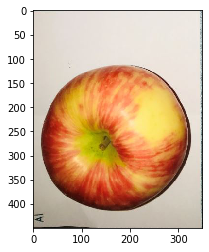

In [161]:
a1t1 = Image.open(path)
print(a1t1.format) #it is jpeg
print(a1t1.size) #size of image
print(a1t1.mode) #it is RGB
## display the image
pyplot.imshow(a1t1)

|name| Description |
|:---:|:---|
|path | path to the the image. Loop needed|
|rp| reference picture|
|rpg| reference pictue in gray scale|

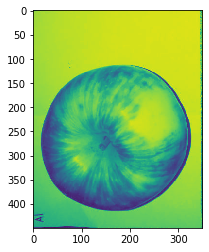

In [162]:
#the reference image
path = OP + "a1t1.JPG"

rp = cv2.imread(path)

rpg=cv2.cvtColor(rp,cv2.COLOR_BGR2GRAY)

pyplot.imshow(rpg)

- result of applying `cv2.findContours( )`

|subjects|method1|
|:---:   | :---: |
|a1      | 1     |
|a2      | 1     |
|a3      | 0     |
|b1      | 0     |
|c2      | 0     |
|d2      | 0     |

# TODO: save images to a folder

In [95]:
#===============================================================================================
#source: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_contours/py_contours_begin/py_contours_begin.html
#there are three arguments in cv2.findContours() function, 
#first one is source image, second is contour retrieval mode, 
#third is contour approximation method. And it outputs the image, 
#contours and hierarchy. contours is a Python list of all the contours in the image. 
#Each individual contour is a Numpy array of (x,y) coordinates of boundary points of the object.
#================================================================================================

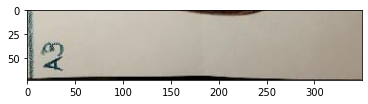

In [164]:
#op is where original picture is located at
OP = "data/B/experiment1/pic/t1/"
path = OP + "a3t1.JPG"

#read image and convert to gray scale
rp = cv2.imread(path)

pyplot.imshow(rp)

rpg=cv2.cvtColor(rp,cv2.COLOR_BGR2GRAY)

edged = cv2.Canny(rpg, 0, 250) 

(cnts, _) = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 

idx = 0
for c in cnts: 
    x,y,w,h = cv2.boundingRect(c) 
    if w>50 and h>50: 
        idx+=1 
        new_img=rp[y:y+h,x:x+w] 
        cv2.imwrite(str(idx) + '.jpg', new_img)

a1 = Image.open('1.jpg')
pyplot.imshow(a1) 

### Template matching

[source](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_template_matching/py_template_matching.html)

In [169]:
#this is image to be processed
img = cv2.imread('data/B/experiment1/pic/t1/a3t1.jpg',0)

#this is template to be used from part 1
template = cv2.imread('data/B/experiment1/pic/t1/c3temp.jpg',0)
#template = cv2.imread('data/B/experiment1/pic/t1/temp.jpg',0)

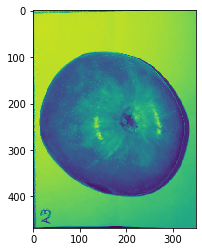

In [170]:
pyplot.imshow(img)

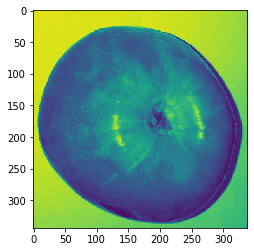

In [171]:
pyplot.imshow(template)

## TODO

- Need to select which one and process the images uisng that 
- Using the same reference apple makes the cropped the images much better!

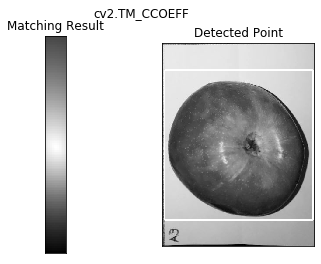

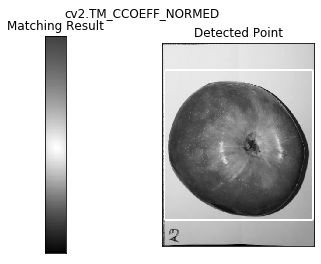

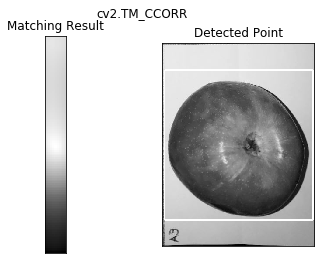

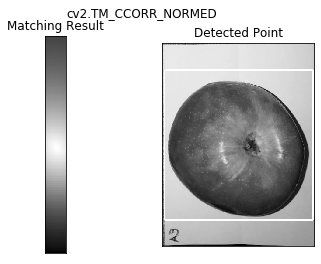

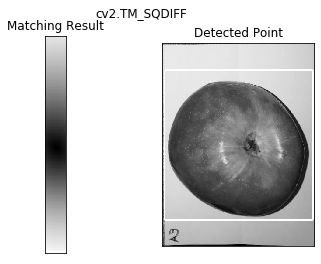

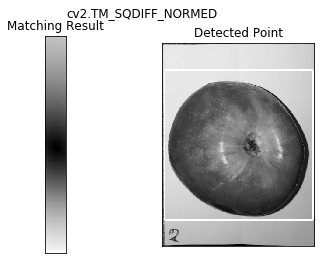

In [172]:
w, h = template.shape[::-1]

# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)

    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv2.rectangle(img,top_left, bottom_right, 255, 2)

    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)

    plt.show()

# Analysis 

In [173]:
type(rp)

numpy.ndarray

In [174]:
image = Image.fromarray(rp)
image = image.convert("RGB")
# image.save('test_test.jpeg')

## Convert the picutre into matrix with 256 by 256

In [175]:
#converting jepg to matrix with integers
ma0 = np.array(image.convert('L').resize((256,256)))
print(ma0.shape)
#now it is
ma0

(256, 256)


array([[154, 207, 218, ..., 199, 199, 199],
       [172, 196, 217, ..., 199, 199, 199],
       [125, 155, 164, ..., 199, 199, 199],
       ...,
       [183, 161,  99, ..., 144, 144, 144],
       [142, 140,  76, ..., 144, 144, 145],
       [ 44,  50,  31, ..., 104, 109, 114]], dtype=uint8)

In [176]:
def show_image(image, title = "Image", cmap_type= 'gray'):
    plt.imshow(image, cmap = cmap_type)
    plt.title(title)
    plt.axis("off")
    plt.show()


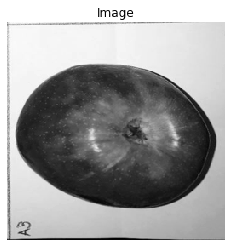

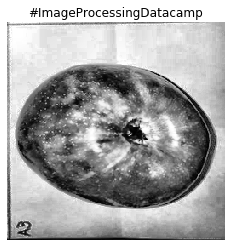

In [177]:
# Import the necessary modules
from skimage import data, exposure

# Load the image
original_image = ma0

# Apply the adaptive equalization on the original image
adapthist_eq_image = exposure.equalize_adapthist(original_image, clip_limit=0.03)

# Compare the original image to the equalized
show_image(original_image)
show_image(adapthist_eq_image, '#ImageProcessingDatacamp')

## Get other pictures

In [148]:
#the future apple condition
# rp = Image.fromarray(rp)
# rp = image.convert("RGB")
ma1 = np.array(image.convert('L').resize((256,256)))
ma2 = np.array(image.convert('L').resize((256,256)))

In [149]:
#flatten to vector
m0 = rp.flatten()
m1 = ma1.flatten()
m2 = ma2.flatten()

#
m0 = m0.astype(int)
m1 = m1.astype(int)
m2 = m2.astype(int)

# Vector projection

## TODO
- Normalizing the reference picture vector, (i.e., a1t1)
- Normalzing additional day pictures (i.e., a1t2, a1t3...a1t25)
- Project a1t2... a1t25 to a1t1, call it pa1t2 .. pa1t25
- Subtract: a1t2 - pa1t2,  ... a1t25-pa1t25
- Multiply the above step by 100.  This should give us percent changes in color.

In [150]:
#our vector
m0.shape

(491400,)

In [156]:
m0 = m0.astype(int)
m0

array([126, 132, 107, ...,  69,  93, 105])

In [157]:
#they all should produce the same value, but they are not
print(np.linalg.norm(m0))
print(np.sqrt(sum(m0**2)))
print(np.sqrt(np.dot(m0, m0)))

117844.6322154726
31661.576934827488
31661.576934827488


C:\Users\Koohong\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in int_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


In [158]:
#small vector
temp = np.array([1, 2, 3])
temp.shape

(3,)

In [159]:
#producing the same values as expected
print(np.linalg.norm(temp))
print(np.sqrt(sum(temp**2)))
print(np.sqrt(np.dot(temp, temp)))

3.7416573867739413
3.7416573867739413
3.7416573867739413


In [ ]:
#get the norm
m0_norm = np.sqrt(sum(temp**2)) 
c0 = (np.dot(temp,temp)/m0_norm**2)
proj00 = (np.dot(temp, temp)/m0_norm**2)*temp
print(round(c0)) 
print(proj00)

1.0
[1. 2. 3.]


In [25]:
#get the norm
m0_norm = np.sqrt(sum(m0**2)) 
c0 = np.dot(m0, m0)
proj00 = (np.dot(m0, m0)/m0_norm**2)*m0
print(round(c0)) 

1874092028


In [ ]:
d0 = m0-proj00
d0_norm = np.sqrt(sum(d0**2))
print(d0_norm) 

43288.75588466474


In [26]:
#projection a1 to a0
proj10 = (np.dot(m1, m0)/m0_norm**2)*m0
d1 = m1-proj10
d1_norm = np.sqrt(sum(d1**2))
print(d1_norm) 

654.1299832914613


In [28]:
#projection a2 to a0
proj20 = (np.dot(m2, m0)/m0_norm**2)*m0
d2 = m2-proj20
d2_norm = np.sqrt(sum(d2**2))
print(d2_norm) 

902.8327235977572


In [ ]:
print(np.linalg.norm(m0))
print(np.linalg.norm(nm0)) #close enough

43290.7845620751
0.9999999999999958


# now normalize the vectors

In [27]:
#normalize the vector
nm0 = m0 / np.linalg.norm(m0)

nm1 = m1 / np.linalg.norm(m1)

nm2 = m2 / np.linalg.norm(m2)

In [ ]:
np.linalg.norm(m0)- np.linalg.norm(m0)

0.0

In [ ]:
#just comparing the norm
np.linalg.norm(m0)- np.linalg.norm(m1)

12.114030276185076

In [ ]:
#comparing the norm of difference 
np.linalg.norm(m2-m0)

7215.408997416571

In [ ]:
#using projection
round(np.linalg.norm(nm0 - np.dot(nm0,nm0)*nm0))

0.0

In [ ]:
#using projection
round(np.linalg.norm(nm2 - np.dot(nm0,nm1)*nm0))

0.0

In [ ]:
round(np.linalg.norm(nm2 - np.dot(nm0,nm2)*nm0))

0.0